# LAB 4: NEURAL NETWORK

In this lab, we will explore Neural Networks, which can be trained using the Gradient Descent algorithm.

Specifically, we will cover the following topics:

- A brief introduction to the PyTorch library for implementing Neural Networks.

- Implementation of a neural network using PyTorch.

- Discussion on overfitting.


**A neuron is like a function; it takes a few inputs and calculates an output. Its adjusts its parameters (training), using the gradient descent method to minimise a loss function**.


The circle below illustrates an artificial neuron.

<figure>
  <img style="float: left;" src="../../fig/NN1.png" width="800"/>
</figure>



At the far left we see two input values plus a bias value. The input values are 1 and 0 (the green numbers), while the bias holds a value of -2 (the brown number).

The two inputs are then multiplied by their  weights, which are 7 and 3 (the blue numbers).

Finally we add it up with the bias and end up with a number, in this case: 5 (the red number). This is the input for our artificial neuron.

The neuron then performs some kind of computation on this number using activation function ( in our case the Sigmoid function), and then spits out an output. This happens to be 1, as Sigmoid of 5 equals to 1, if we round the number up (more about activation function down).

You can find more explanation about the structure [here](https://www.leewayhertz.com/what-are-neural-networks/#What-are-neural-networks)



# Single layer network : Perceptron

The perceptron algorithm was one of the first algorithms used to implement a simple neural network.

Perceptrons are supervised learning algorithms and is a type of an ANN

Let's remind th components of a Perceptron:
    
- Inputs: The perceptron takes several inputs $(x_1,x_2,…,x_n)$


- Weights: Each input is associated with a weight $(w_1,w_2,…,w_n).$

- Bias: A bias term $(b or w_0)$ is added to shift the decision boundary.

- Activation Function: The perceptron uses a step function (a simple thresholding function) to determine whether the weighted sum of inputs plus the bias is above or below a certain threshold.

- Binary Output: The output of a perceptron is binary (-1 or 1 that can be easily switched to 0 or 1), making it suitable for linearly separable classification problems.

### Limitations of Perceptron:

- Linear separability: The perceptron can only solve problems that are linearly separable (i.e., it can only classify data that can be separated by a straight line or hyperplane). It cannot solve more complex problems like XOR.

- Single-layer model: The original perceptron is a single-layer model and does not have hidden layers, limiting its expressiveness.

.

<figure>
  <img style="float: left;" src="../../fig/perceptron.png" width="800"/>
</figure>

# Activation Functions

Activation functions play an integral role in neural networks by introducing non-linearity.
This non-linearity allows neural networks to develop complex representations and functions based on the inputs that would not be possible with a simple linear layers.

You can find all types of activation functions [here](https://www.shiksha.com/online-courses/articles/activation-functions-with-real-life-analogy-and-python-code/)

Unlike the perceptron, which uses a simple step function for activation, neurons in modern neural networks can use a variety of activation functions, such as:

<figure>
  <img style="float: left;" src="../../fig/activation_function.png" width="800"/>
</figure>


# Multi-layer Networks

Multi-layer Networks: Neurons are part of more sophisticated architectures called multi-layer perceptrons (MLPs) or deep neural networks, where neurons are organized into layers (input layer, hidden layers, and output layer). Each layer performs computations, and the output of one layer is fed as input to the next.

<figure>
  <img style="float: left;" src="../../fig/MLP.png" width="800"/>
</figure>

Each hidden/output node is now related to all the nodes of the previous layer: we say that the network is fully connected.


###  Inputs to the 2nd Hidden Layer
The inputs to a neuron in the 2nd hidden layer come from the outputs of the neurons in the 1st hidden layer.

Here we have:
- $ h_1^1, h_1^2, h_1^3,h_1^4 $ represent the activations (outputs) of the neurons in the **1st hidden layer**. These are the inputs to the neurons in the 2nd hidden layer.
.

- Let's assume that $ w_{ij}^{(3)} $ represent the weights connecting neuron $ i $ in the 1st hidden layer to neuron $ j $ in the 2nd hidden layer.
.

- $ b_j^{2} $ is the bias for neuron $ j $ in the 2nd hidden layer.



### Weighted Sum for a Neuron in the 2nd Hidden Layer
The value of the weighted sum for neuron $ j $ in the 2nd hidden layer is:

$$
a_j^{2} = \sum_{i=1}^{4} w_{ij}^{2} h_i^{1} + b_j^{2}
$$


After computing the weighted sum $a_j^{2}$, we apply an activation function $ f(a_j^{2}) $ to compute the final output (activation) of the neuron. 


So the output (activation) of neuron $ j $ in the 2nd hidden layer is:


$$
h_j^{2} = f\left(\sum_{i=1}^{4} w_{ij}^{2} h_i^{1} + b_j^{2} \right)
$$



If we are using an activation function like ReLU, sigmoid, or tanh, the output of neuron $ j $ in the 2nd hidden layer would be:

- **Sigmoid**:
  $$
  h_j^{2} = \frac{1}{1 + e^{-a_j^{2}}}
  $$
- **ReLU**:
  $$
 h_j^{2} = \max(0, a_j^{2})
  $$
- **Tanh**:
  $$
 h_j^{2} = \tanh(a_j^{2}) = \frac{e^{a_j^{2}} - e^{-a_j^{2}}}{e^{a_j^{2}} + e^{-a_j^{2}}}
  $$




#  Training the Neural Network

To train a NN, we need to follow those process: 

- Forward pass: Compute the outputs.

- Compute loss: Compare outputs with actual labels.

- Backward pass: Compute gradients of loss with respect to weights and bias.

- Optimize: Update weights using the optimizer (e.g., Adam, SGD).

- Repeat for many epochs, using batches of data.



### Forward pass 

The action of obtaining the output y from the input x is called a forward pass.

In the forward pass, the input values are multiplied by the weights, biases are added, and the result is passed through an activation function. This process is repeated for every layer, eventually yielding the output of the network.

We can implement the forward pass of our multi-layer perceptron in a few lines. We use random weights and bias for the example:

In [1]:
import numpy as np

sizes = [3, 4, 3, 1]  # number of neurons in each layer
num_layers = len(sizes)  # one input layer, 2 hidden layers and one output layer

# the first layer does not have bias as it's the input layer
biases = [np.random.randn(sizes[i], 1) for i in range(1, num_layers)]

# we use the transpose of the weight matrices cause we need the same size as the bias vector
weights = [np.random.randn(sizes[i], sizes[i-1]) for i in range(1, num_layers)]


In [2]:
weights

[array([[ 0.78348643, -0.06738089,  1.34661589],
        [ 1.31598614,  1.12852299, -0.27159473],
        [-0.29858277, -0.89431423, -0.59475489],
        [ 0.5898264 ,  1.39775886,  0.3129468 ]]),
 array([[ 3.21794160e-01,  1.75997769e-01, -9.98966175e-02,
         -2.33556082e-01],
        [-2.16193132e-01, -7.28114814e-01, -6.46163747e-01,
         -1.86771938e-01],
        [-8.68582477e-01, -5.78787256e-01, -5.14342258e-04,
         -2.40330091e+00]]),
 array([[ 0.44311979, -1.36625111,  0.12655071]])]

Once we have initialized the network size and its parameters, we are ready to implement the forward pass. We can then feed the network with any arbitrary input.

In [3]:
# Define an activation function
def g(z):
    """Sigmoid function."""
    return 1.0/(1.0 + np.exp(-z)) 

# define output/input relation for a MLP
def network_forward(h): 
    """Return the output of the network given input h."""
    for b, w in zip(biases, weights):
        z = np.dot(w, h) + b # mat-vect product + bias
        h = g(z) # apply activation function
    return h

# Example input
input = np.array([[1.],[2.],[3.]]) # a column vector (1,2,3)^T
output = network_forward(input)
print(output)

[[0.80041466]]


### Compute the Loss/Cost function:

The loss function measures how far off the network’s predictions are from the true labels.
Some common loss functions are:

- Mean Squared Error (MSE) for regression tasks.

- Cross-Entropy Loss for classification tasks (either binary or multi-class)

In [4]:
def binary_cross_entropy_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


### Backward Pass (Backpropagation):

The backward pass involves calculating the gradients of the loss with respect to the weights and biases in each layer.

The gradients are then used to update the weights and biases to minimize the loss (i.e., make the model’s predictions more accurate).

This process is called backpropagation cause it uses the chain rule from calculus to compute the gradients layer by layer, starting from the output layer and moving backward through the network

.

<figure>
  <img style="float: left;" src="../../fig/bp.png" width="800"/>
</figure>

# Implement NN with pytorch

PyTorch is one of the most widely used libraries for developing deep learning models. Tensors are one of the fundamental components of PyTorch. You can think of tensors as similar to NumPy arrays.

Using tensors, PyTorch can create computational graphs and calculate gradients.

We will cover the basic concepts of PyTorch and provide further explanations as we progress through the implementation.

you can find the [PyTorch tutorials here](https://pytorch.org/tutorials/beginner/basics/intro.html)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

In [6]:
## Transform array to tensor with pytorch

tensor_1 = torch.tensor([[1., 2.], 
                         [3., 3.]])

tensor_2 = torch.tensor([[1., 0], 
                         [-1., 0]])

print("tensor_1 shape: ", tensor_1.shape)
print("tensor_2 shape: ", tensor_2.shape)

tensor_1 shape:  torch.Size([2, 2])
tensor_2 shape:  torch.Size([2, 2])


In [7]:
## Element Multiplication

elem_mul = tensor_1 * tensor_2
print("Element wise multiplication")
print("Result shape: ", elem_mul.size())
elem_mul

Element wise multiplication
Result shape:  torch.Size([2, 2])


tensor([[ 1.,  0.],
        [-3.,  0.]])

In [8]:
## Matrix Multiplication

matrix_mul = torch.matmul(tensor_1,tensor_2)
print("Matrix multiplication")
print("Result shape: ", matrix_mul.size())
torch.matmul(tensor_1,tensor_2)

Matrix multiplication
Result shape:  torch.Size([2, 2])


tensor([[-1.,  0.],
        [ 0.,  0.]])

In [9]:
# get tensor as numpy array
tensor_1.data.numpy()

array([[1., 2.],
       [3., 3.]], dtype=float32)

In [33]:
# Define the layers manually
input_size = 3
hidden_size1 = 4
hidden_size2 = 3
output_size = 2

# Create the layers
fc1 = nn.Linear(input_size, hidden_size1)  # Input to hidden layer
fc2 = nn.Linear(hidden_size1, hidden_size2)  # Hidden layer 1 to hidden layer 2
fc3 = nn.Linear(hidden_size2, output_size)  # Hidden layer 2 to output layer

# Define activation functions
relu = nn.ReLU()
sigmoid = nn.Sigmoid()

# Loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD([fc1.weight, fc1.bias, fc2.weight, fc2.bias, fc3.weight, fc3.bias], lr=0.001)

# Example input (2 samples, 3 features each)
inputs = torch.tensor([[0.1, 0.2, 0.3],
                       [0.4, 0.5, 0.6]], dtype=torch.float32)

#  true output labels
labels = torch.tensor([[0, 1],
                       [1, 0]], dtype=torch.float32)

# Number of epochs
epochs = 2000
loss_values = []  # List to store loss at each epoch

for epoch in range(epochs):
    # Forward pass
    z1 = fc1(inputs)  # Linear combination in hidden layer 1
    a1 = relu(z1)     # Apply ReLU activation
    z2 = fc2(a1)  # Linear combination in hidden layer 2
    a2 = relu(z2)     # Apply ReLU activation again
    z3 = fc3(a2)      # Linear combination in output layer
    outputs = sigmoid(z3)  # Apply Sigmoid activation in the output layer\
    
    # Convert probabilities to binary predictions (0 or 1)
    binary_outputs = torch.round(outputs)

    # Compute loss
    loss = criterion(outputs, labels)

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()
    
    # Store the loss value for this epoch
    loss_values.append(loss.item())
    
    # Print loss every 100 epochs for monitoring
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [5/2000], Loss: 0.7124
Epoch [10/2000], Loss: 0.7122
Epoch [15/2000], Loss: 0.7119
Epoch [20/2000], Loss: 0.7114
Epoch [25/2000], Loss: 0.7109
Epoch [30/2000], Loss: 0.7102
Epoch [35/2000], Loss: 0.7095
Epoch [40/2000], Loss: 0.7086
Epoch [45/2000], Loss: 0.7077
Epoch [50/2000], Loss: 0.7067
Epoch [55/2000], Loss: 0.7056
Epoch [60/2000], Loss: 0.7045
Epoch [65/2000], Loss: 0.7034
Epoch [70/2000], Loss: 0.7022
Epoch [75/2000], Loss: 0.7010
Epoch [80/2000], Loss: 0.6999
Epoch [85/2000], Loss: 0.6988
Epoch [90/2000], Loss: 0.6977
Epoch [95/2000], Loss: 0.6966
Epoch [100/2000], Loss: 0.6956
Epoch [105/2000], Loss: 0.6947
Epoch [110/2000], Loss: 0.6939
Epoch [115/2000], Loss: 0.6932
Epoch [120/2000], Loss: 0.6926
Epoch [125/2000], Loss: 0.6922
Epoch [130/2000], Loss: 0.6918
Epoch [135/2000], Loss: 0.6916
Epoch [140/2000], Loss: 0.6915
Epoch [145/2000], Loss: 0.6916
Epoch [150/2000], Loss: 0.6917
Epoch [155/2000], Loss: 0.6920
Epoch [160/2000], Loss: 0.6925
Epoch [165/2000], Loss: 0.69

In [34]:
# Print results
print("Outputs (Probabilities):\n", outputs)
print()
print("Binary Outputs (0 or 1):\n", binary_outputs)

Outputs (Probabilities):
 tensor([[9.5377e-10, 1.0000e+00],
        [1.0000e+00, 0.0000e+00]], grad_fn=<SigmoidBackward0>)

Binary Outputs (0 or 1):
 tensor([[0., 1.],
        [1., 0.]], grad_fn=<RoundBackward0>)


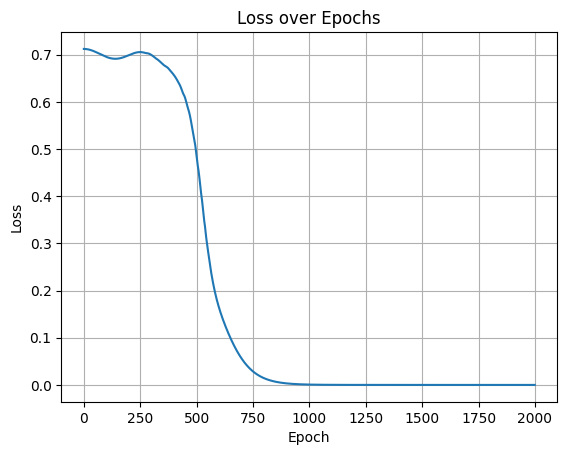

In [35]:
# Plot the loss over epochs
plt.plot(loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.grid(True)
plt.show()

### Task:

- Modify the neural network to include more hidden layers (e.g., add another hidden layer with different size).

- Experiment with different activation functions (e.g., Tanh, LeakyReLU, etc.) in the hidden layers and observe the effect on output probabilities.

- Experiment with different optimizers such as Adam, RMSprop, and Adagrad in place of SGD, and observe their effect on model performance.

### Questions:

- How does changing the number of hidden layers affect the model's ability to classify the data?

- What happens if you use a different activation function in the hidden layers instead of ReLU (e.g., Tanh or LeakyReLU)? Show the effect on the binary outputs.

- How does changing the optimizer affect the convergence of the model?

- Which optimizer performed best for this dataset, and why do you think that is?


In [24]:
# Define the layers manually
input_size = 3
hidden_size1 = 4
hidden_size2 = 3
hidden_size3 = 6
output_size = 2

# Create the layers
fc1 = nn.Linear(input_size, hidden_size1)  # Input to hidden layer
fc2 = nn.Linear(hidden_size1, hidden_size2)  # Hidden layer 1 to hidden layer 2
fc3 = nn.Linear(hidden_size2, hidden_size3)  # Hidden layer 1 to hidden layer 2
fc4 = nn.Linear(hidden_size3, output_size)  # Hidden layer 2 to output layer

# Define activation functions
relu = nn.ReLU()
sigmoid = nn.Sigmoid()

# Loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD([fc1.weight, fc1.bias, fc2.weight, fc2.bias, fc3.weight, fc3.bias, fc4.weight, fc4.bias], lr=0.01)

# Example input (2 samples, 3 features each)
inputs = torch.tensor([[0.1, 0.2, 0.3],
                       [0.4, 0.5, 0.6]], dtype=torch.float32)

#  true output labels
labels = torch.tensor([[0, 1],
                       [1, 0]], dtype=torch.float32)

# Number of epochs
epochs = 200
loss_values = []  # List to store loss at each epoch

for epoch in range(epochs):
    # Forward pass
    z1 = fc1(inputs)  # Linear combination in hidden layer 1
    a1 = relu(z1)     # Apply ReLU activation
    z2 = fc2(a1)  # Linear combination in hidden layer 2
    a2 = relu(z2)     # Apply ReLU activation again
    z3 = fc3(a2) # Linear combination in output layer
    a3 = relu(z3)
    z4 = fc4(a3)
    outputs = sigmoid(z4)  # Apply Sigmoid activation in the output layer\
    
    # Convert probabilities to binary predictions (0 or 1)
    binary_outputs = torch.round(outputs)

    # Compute loss
    loss = criterion(outputs, labels)

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()
    
    # Store the loss value for this epoch
    loss_values.append(loss.item())
    
    # Print loss every 100 epochs for monitoring
    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [50/200], Loss: 0.7018
Epoch [100/200], Loss: 0.6951
Epoch [150/200], Loss: 0.7044
Epoch [200/200], Loss: 0.6938


In [25]:
# Print results
print("Outputs (Probabilities):\n", outputs)
print()
print("Binary Outputs (0 or 1):\n", binary_outputs)

Outputs (Probabilities):
 tensor([[0.5167, 0.5186],
        [0.5167, 0.5186]], grad_fn=<SigmoidBackward0>)

Binary Outputs (0 or 1):
 tensor([[1., 1.],
        [1., 1.]], grad_fn=<RoundBackward0>)


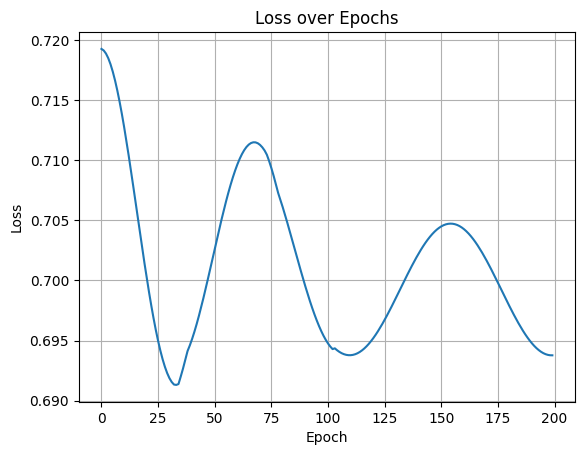

In [26]:
# Plot the loss over epochs
plt.plot(loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.grid(True)
plt.show()

# Let's try with a real dataset

### Breast Cancer  Dataset

The **Breast Cancer  Dataset** is a widely-used dataset for binary classification tasks in machine learning, provided by the `sklearn` library. It contains data from breast cancer, with the goal of classifying tumors as **malignant** (cancerous) or **benign** (non-cancerous).

- **Number of samples:** 569

- **Number of features:** 30 numeric features

- **Target classes:** 
  - 0 = malignant (212 samples)
  - 1 = benign (357 samples)
  
- **Features:** Each feature represents a characteristic of cell nuclei (e.g., radius, texture, smoothness), calculated from digitized images of breast masses. The features include mean, standard error, and worst (largest) values of each characteristic.

You can find more about this dataset [here](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

In [14]:
# 1. Load and preprocess the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [15]:
# Create a DataFrame with the feature data
df = pd.DataFrame(data=data.data, columns=data.feature_names)

# Add the target labels to the DataFrame
df['target'] = data.target

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [16]:
# Split the dataset into train, validation, and test sets (60% train, 20% val, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [17]:
# Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [18]:
# Convert data to PyTorch tensors
train_dataset = TensorDataset(X_train, y_train)  

X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Shape (n_samples, 1)
y_val = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)      
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)    

# unsqueeze(1) is added because it is often required for compatibility with neural network layers 
#that expect a 2D input for the target tensor

TypeError: 'int' object is not callable

### Batches

When we train neural network we usually train our model using batches of training example.


Batching method is performed for different reasons. First of all in we have a huge dataset we cannot fit all the data in our memery. Moreover, using batches requires less time to fit the model as in the same time you can perform more update in the weights of the model. 

So batch size is an additional hyperparameter of our training algorithm.

PyTorch provides two main data classes: DataLoader and Dataset to handle your data.

Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the batches.

you can read more at: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

Let's continue😅

In [ ]:
# Create DataLoader for mini-batch training
batch_size = 32
# Create TensorDatasets
train_dataset = TensorDataset(X_train, y_train)  
val_dataset = TensorDataset(X_val, y_val)        
test_dataset = TensorDataset(X_test, y_test)     

# Create DataLoader
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
#  Define the neural network structure
input_size = X_train.shape[1]  # Number of features in the dataset
hidden_size1 = 16
hidden_size2 = 8
output_size = 1  # Binary classification (0 or 1)

# Create the model
model = nn.Sequential(
    nn.Linear(input_size, hidden_size1),
    nn.ReLU(),
    nn.Linear(hidden_size1, hidden_size2),
    nn.ReLU(),
    nn.Linear(hidden_size2, output_size),
    nn.Sigmoid()
)

# Loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [ ]:
#  Train the model
epochs = 1000
loss_values, train_accuracies, val_accuracies,val_losses = [], [], [],[]

for epoch in range(epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)  
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    loss_values.append(loss.item())
    
    # Validation loss calculation
    model.eval()
    with torch.no_grad():
        val_loss = 0
        for val_X, val_y in val_loader:
            val_outputs = model(val_X)
            val_loss += criterion(val_outputs, val_y).item()
        val_loss /= len(val_loader)  # Average loss for validation
        val_losses.append(val_loss)
        
        # Accuracy calculations
        train_accuracy = (model(X_train).round().eq(y_train).sum() / y_train.size(0)).item()
        val_accuracy = (model(X_val).round().eq(y_val).sum() / y_val.size(0)).item()
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_accuracy:.2f}, Val Acc: {val_accuracy:.2f}')

In [ ]:
# Plot loss and accuracy
plt.figure(figsize=(14, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(loss_values, label='Train Loss')
plt.plot(val_losses, label='Val Loss', linestyle='--')  # Validation loss in dashed line
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#  Evaluate the model on test data
with torch.no_grad():
    test_accuracy = (model(X_test).round().eq(y_test).sum() / y_test.size(0)).item()

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# TASK 1

### Model Architecture

- Modify the existing model architecture (e.g., add more layers, change the number of neurons).

- Experiment with different activation functions (e.g., Tanh, Leaky ReLU).

RETRAIN THE MODEL AND COMMENT THE DIFFERENCE IF IT EXISTS.

### Hyperparameter Tuning:

- Change the learning rate, batch size, and the number of epochs.

- Compare the effects of different optimizers (e.g., Adam, RMSprop) on model performance.

Regularization Techniques:

- Implement L2 regularization (weight decay) in the optimizer.

- Introduce dropout layers to prevent overfitting and discuss their impact on training and validation accuracy.

To add L2 regularization or dropout, you can modify the optimizer or the model structure ( dropout is added after the activation function in the model architectiure, Weight decay is added inside the regularization function (SGD or ADAM))

SAVE THE MODEL ARCHITECTURE YOU DID BEFORE, RETRAIN THE MODEL AND COMMENT THE DIFFERENCE IF IT EXISTS.

### Early Stopping:
Early stopping is an optimization technique used to reduce overfitting without compromising on model accuracy. The main idea behind early stopping is to stop training before a model starts to over-fit.

- Implement early stopping based on validation loss to avoid overfitting.

- Discuss the importance of early stopping in training deep learning models.

SAVE ALL YOUR CHANGES AND ADD EARLY STOPPING, RETRAIN THE MODEL AND COMMENT THE DIFFERENCE IF IT EXISTS.

# TASK 2: Build and Evaluate a Regression Model



**Objective**: Build a regression model using the class dataset to predict the weight. Evaluate the model’s performance using various metrics.

### Steps to Follow

1. **Data Loading**: 

2. **Data Preprocessing**:
   - Encode the categorical data
   
   - Apply oversampling on minority class for data balance
   
   - Split the dataset into training, validation, and test sets (e.g., 70% training, 15% validation, 15% test).
   
   - Normalize the features using standard scaling or min-max scaling.
   
   - Convert the datasets into PyTorch tensors.

3. **Model Development**:

   - Define a neural network architecture for regression. 
   
   - Use appropriate activation functions and output layers.
   
 
4. **Loss Function and Optimizer**:

   - Use Mean Squared Error (MSE) loss for regression.
   
   - Choose an optimizer (e.g., Adam or SGD).
   
   - Example:
     ```python
     criterion = nn.MSELoss()
     optimizer = optim.Adam(model.parameters(), lr=0.001)
     ```

5. **Training the Model**:

    - No need to use Batches because you don't have a big dataset

   - Train the model over a specified number of epochs.
   
   - Store loss values for visualization.
   
   - Print the training and validation loss at the end of each epoch.

6. **Model Evaluation**:

   - Evaluate the model on the test set and calculate the following metrics:
   
     - Mean Absolute Error (MAE)
     - Mean Squared Error (MSE)
     
   - Example of calculating metrics:
     ```python
     from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

     with torch.no_grad():
         model.eval()
         y_pred = model(torch.tensor(X_test, dtype=torch.float32)).numpy()
     
     mae = mean_absolute_error(y_test, y_pred)
     mse = mean_squared_error(y_test, y_pred)

     ```

7. **Visualization**:

   - Plot the training and validation loss over epochs to visualize training progress.
   
   - Create scatter plots of predicted vs. actual values to assess model performance visually.